In [130]:
from tslearn.datasets import CachedDatasets
import os
import numpy as np
from tqdm.notebook import tqdm
from tslearn.metrics import dtw

In [2]:
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")

In [7]:
X_train.shape

array([[ 0.54407,  0.65786,  0.61124, ...,  0.60377,  0.59633,  0.58322],
       [ 0.76643,  0.62463,  0.74225, ...,  0.72218,  0.66786,  0.72445],
       [-2.045  , -2.0917 , -2.0776 , ...,  0.52429,  0.54742,  0.57056],
       ...,
       [-1.2657 , -1.2381 , -1.2569 , ...,  0.90231,  0.87317,  0.84577],
       [ 0.67424,  0.6995 ,  0.72477, ...,  0.68093,  0.61272,  0.6502 ],
       [ 0.76816,  0.71678,  0.76064, ...,  0.76741,  0.75562,  0.67906]])

In [6]:
y_train.shape

(100,)

In [19]:
os.chdir("D:\PyCharm\mvts_fss_ay")

In [11]:
from data_cleaning.helper_functions import Sample

In [25]:
path_FL = os.path.join(os.getcwd(),"data\partition1","FL")
print(len(os.listdir(path_FL)))

1254


In [72]:
np.array(data_files).flatten().shape

(2,)

In [89]:
M_count = 0
X_count = 0
data_files = []

i=1
data_files_M.append(os.listdir(path_FL)[:100])
data_files_X.append(os.listdir(path_FL)[1089:(1089+99)])
    

array(None, dtype=object)

In [114]:
def generate_flare_set(path):
    x_count = 100
    m_count = 100
    files = []
    for file in os.listdir(path):
        if file[0] == 'M' and m_count >0:
            files.append(file)
            m_count-=1
        elif file[0] == "X" and x_count >0:
            files.append(file)
            x_count-=1

    return files

In [115]:
files = generate_flare_set(path_FL)

In [151]:
s1 = Sample("FL",files[0]).get_data().iloc[:,:25].set_index("Timestamp")
s2 = Sample("FL", files[1]).get_data().iloc[:,:25].set_index("Timestamp")
s3 = Sample("FL", files[2]).get_data().iloc[:,:25].set_index("Timestamp")
s4 = Sample("FL", files[3]).get_data().iloc[:,:25].set_index("Timestamp")
s5 = Sample("FL", files[4]).get_data().iloc[:,:25].set_index("Timestamp")
s6 = Sample("FL", files[5]).get_data().iloc[:,:25].set_index("Timestamp")

In [175]:
s1.values

array([[ 1.31512064e+03,  1.84249705e+10,  3.01690142e+23, ...,
        -6.04281689e-02, -8.50548929e-02,  4.39252628e+00],
       [ 1.29529138e+03,  1.84362189e+10,  3.02408756e+23, ...,
        -6.04786143e-02, -8.31196360e-02,  4.38484094e+00],
       [ 1.29107235e+03,  1.84317213e+10,  3.01902259e+23, ...,
        -6.03954174e-02, -8.19217716e-02,  4.36935959e+00],
       ...,
       [ 1.26301717e+03,  1.70505430e+10,  2.86850258e+23, ...,
        -7.62526072e-02, -7.49796940e-02,  4.04424723e+00],
       [ 1.25975811e+03,  1.70497188e+10,  2.87663620e+23, ...,
        -7.66902904e-02, -7.34150853e-02,  4.05063723e+00],
       [ 1.26777601e+03,  1.70489327e+10,  2.88869871e+23, ...,
        -7.43865614e-02, -7.34982496e-02,  4.00749475e+00]])

In [146]:
s2.head(5)

,TOTUSJH,TOTBSQ,TOTPOT,TOTUSJZ,ABSNJZH,SAVNCPP,USFLUX,TOTFZ,MEANPOT,EPSZ,...,MEANGBZ,MEANGBH,MEANJZH,TOTFY,MEANJZD,MEANALP,TOTFX,EPSY,EPSX,R_VALUE
Timestamp,,,,,,,,,,,,,,,,,,,,,
2011-02-17 00:00:00,1293.590838,1.843164e+10,2.966865e+23,2.386734e+13,211.799846,4.298093e+12,1.581053e+22,-6.109278e+24,9991.103975,-0.249582,...,116.025270,62.122952,-0.009472,1.469346e+24,0.264376,-0.018392,1.980922e+24,-0.060027,-0.080927,4.234585
2011-02-17 00:12:00,1272.951275,1.839969e+10,2.962582e+23,2.365107e+13,225.499508,5.545256e+12,1.574975e+22,-6.095441e+24,10004.871958,-0.249449,...,115.501213,62.428087,-0.010113,1.470476e+24,0.312773,-0.019618,1.929641e+24,-0.060178,-0.078968,4.112477
2011-02-17 00:24:00,1260.575999,1.844800e+10,2.966335e+23,2.374461e+13,214.359155,4.402045e+12,1.571762e+22,-6.119242e+24,10081.750062,-0.249767,...,115.721708,63.136699,-0.009675,1.481135e+24,0.313308,-0.018595,1.921864e+24,-0.060455,-0.078444,4.094405
2011-02-17 00:36:00,1281.635682,1.845266e+10,2.981304e+23,2.390144e+13,206.392747,3.843273e+12,1.563865e+22,-6.035613e+24,10228.188057,-0.246292,...,115.838244,63.812580,-0.009404,1.496731e+24,0.296826,-0.017949,1.919898e+24,-0.061076,-0.078344,4.105793
2011-02-17 00:48:00,1292.844758,1.841033e+10,2.974943e+23,2.391549e+13,202.922068,4.494566e+12,1.560420e+22,-6.006244e+24,10254.021487,-0.245657,...,116.026974,63.750915,-0.009290,1.503385e+24,0.400746,-0.017697,1.906391e+24,-0.061489,-0.077972,4.168011


In [153]:
dtw(s1.values,s2.values,s3.values,s4.values,s5.values)

TypeError: unhashable type: 'numpy.ndarray'

In [161]:
from dtaidistance import dtw,dtw_ndim

In [164]:
timeseries = [s1.values,s2.values,s3.values,s4.values,s5.values]
ds = dtw.distance_matrix_fast(timeseries)

In [184]:
timeseries = []

In [168]:
timeseries

[]

In [185]:
for file in tqdm(files):
    data = Sample("FL",file).get_data().iloc[:,1:25].to_numpy()
    timeseries.append(data)

  0%|          | 0/200 [00:00<?, ?it/s]

In [193]:
from dtaidistance import dtw, clustering
model = clustering.KMedoids(dtw.distance_matrix_fast, {}, k=3)
cluster_idx = model.fit(timeseries)
model.plot("kmedoids.png")

(None, None)

In [190]:
from dtaidistance import dtw, clustering

array([[0.00000000e+00, 3.58914553e+23, 2.25725886e+23, ...,
        7.27193999e+24, 7.39650280e+24, 6.86564756e+24],
       [3.58914553e+23, 0.00000000e+00, 3.41977826e+23, ...,
        7.52979868e+24, 7.65546066e+24, 7.11242324e+24],
       [2.25725886e+23, 3.41977826e+23, 0.00000000e+00, ...,
        7.23073402e+24, 7.35789021e+24, 6.81996801e+24],
       ...,
       [7.27193999e+24, 7.52979868e+24, 7.23073402e+24, ...,
        0.00000000e+00, 2.95093652e+23, 5.57735281e+23],
       [7.39650280e+24, 7.65546066e+24, 7.35789021e+24, ...,
        2.95093652e+23, 0.00000000e+00, 6.44263043e+23],
       [6.86564756e+24, 7.11242324e+24, 6.81996801e+24, ...,
        5.57735281e+23, 6.44263043e+23, 0.00000000e+00]])

In [199]:
for key,value in cluster_idx.items():
    print(f'{key}-->[{value}]')

28-->[{28}]
116-->[{12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 167, 168, 169, 170, 171, 172, 173, 174, 175}]
190-->[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 93, 94, 95, 96, 97, 98, 99, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199}]


In [200]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

In [212]:
ds_copy = np.nan_to_num(ds)
ds_copy

array([[0.00000000e+00, 3.58914553e+23, 2.25725886e+23, ...,
        7.27193999e+24, 7.39650280e+24, 6.86564756e+24],
       [3.58914553e+23, 0.00000000e+00, 3.41977826e+23, ...,
        7.52979868e+24, 7.65546066e+24, 7.11242324e+24],
       [2.25725886e+23, 3.41977826e+23, 0.00000000e+00, ...,
        7.23073402e+24, 7.35789021e+24, 6.81996801e+24],
       ...,
       [7.27193999e+24, 7.52979868e+24, 7.23073402e+24, ...,
        0.00000000e+00, 2.95093652e+23, 5.57735281e+23],
       [7.39650280e+24, 7.65546066e+24, 7.35789021e+24, ...,
        2.95093652e+23, 0.00000000e+00, 6.44263043e+23],
       [6.86564756e+24, 7.11242324e+24, 6.81996801e+24, ...,
        5.57735281e+23, 6.44263043e+23, 0.00000000e+00]])

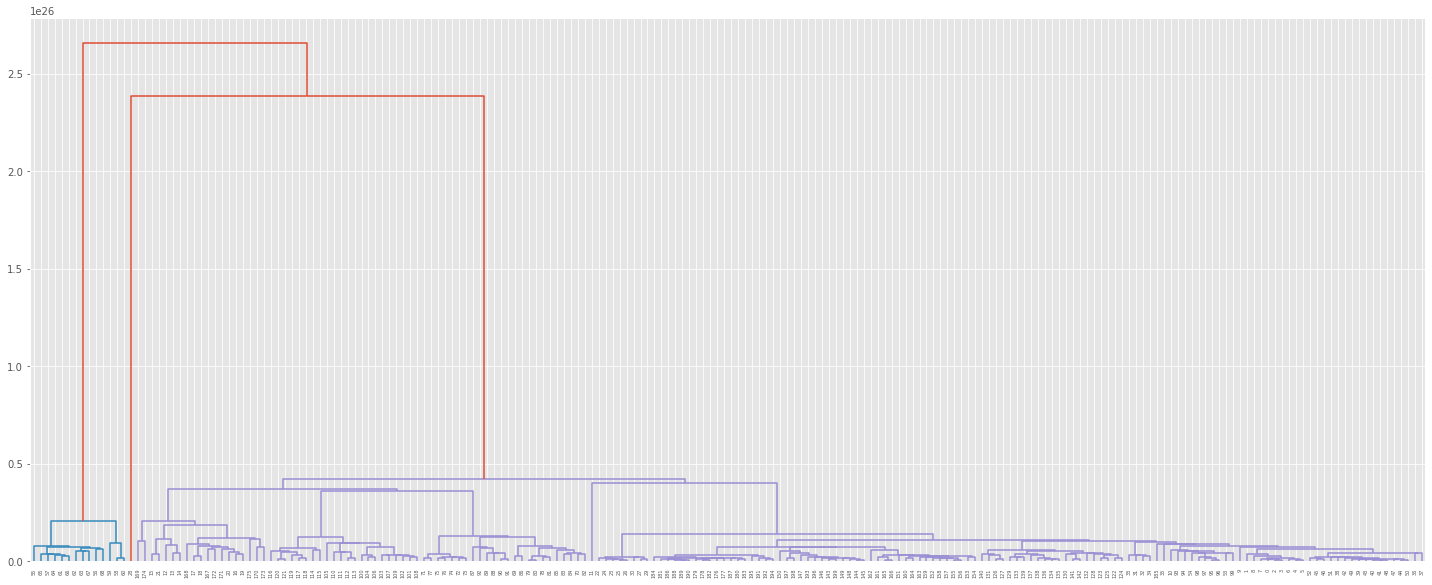

In [221]:
Z = linkage(ds_copy,method='single')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

In [222]:
ds_copy.shape

(200, 200)

In [226]:
from sklearn.neighbors import kneighbors_graph
A = kneighbors_graph(ds_copy, 3, mode='connectivity', include_self=True)

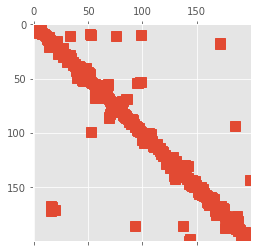

In [230]:
plt.spy(A);

In [233]:
import networkx as nx
G = nx.Graph(A)

In [234]:
G

In [235]:
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199))

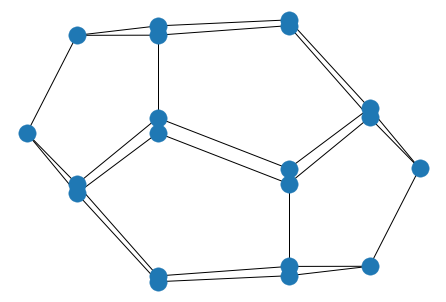

In [242]:
nx.draw_spectral(G)

In [243]:
print(A)

  (0, 0)	1.0
  (0, 2)	1.0
  (0, 3)	1.0
  (1, 1)	1.0
  (1, 0)	1.0
  (1, 2)	1.0
  (2, 2)	1.0
  (2, 3)	1.0
  (2, 0)	1.0
  (3, 3)	1.0
  (3, 2)	1.0
  (3, 7)	1.0
  (4, 4)	1.0
  (4, 5)	1.0
  (4, 6)	1.0
  (5, 5)	1.0
  (5, 4)	1.0
  (5, 6)	1.0
  (6, 6)	1.0
  (6, 5)	1.0
  (6, 4)	1.0
  (7, 7)	1.0
  (7, 3)	1.0
  (7, 2)	1.0
  (8, 8)	1.0
  :	:
  (191, 194)	1.0
  (192, 192)	1.0
  (192, 194)	1.0
  (192, 191)	1.0
  (193, 193)	1.0
  (193, 196)	1.0
  (193, 199)	1.0
  (194, 194)	1.0
  (194, 192)	1.0
  (194, 191)	1.0
  (195, 195)	1.0
  (195, 194)	1.0
  (195, 191)	1.0
  (196, 196)	1.0
  (196, 199)	1.0
  (196, 193)	1.0
  (197, 197)	1.0
  (197, 198)	1.0
  (197, 144)	1.0
  (198, 198)	1.0
  (198, 197)	1.0
  (198, 144)	1.0
  (199, 199)	1.0
  (199, 143)	1.0
  (199, 196)	1.0


In [245]:
A_copy = 0.5* (A + A.T)

In [246]:
A_copy

<200x200 sparse matrix of type '<class 'numpy.float64'>'
	with 728 stored elements in Compressed Sparse Row format>

In [247]:
print(A_copy)

  (0, 1)	0.5
  (0, 3)	0.5
  (0, 2)	1.0
  (0, 0)	1.0
  (1, 2)	0.5
  (1, 0)	0.5
  (1, 1)	1.0
  (2, 7)	0.5
  (2, 1)	0.5
  (2, 0)	1.0
  (2, 3)	1.0
  (2, 2)	1.0
  (3, 0)	0.5
  (3, 7)	1.0
  (3, 2)	1.0
  (3, 3)	1.0
  (4, 6)	1.0
  (4, 5)	1.0
  (4, 4)	1.0
  (5, 8)	0.5
  (5, 6)	1.0
  (5, 4)	1.0
  (5, 5)	1.0
  (6, 8)	0.5
  (6, 4)	1.0
  :	:
  (192, 194)	1.0
  (192, 192)	1.0
  (193, 199)	0.5
  (193, 196)	1.0
  (193, 193)	1.0
  (194, 195)	0.5
  (194, 191)	1.0
  (194, 192)	1.0
  (194, 194)	1.0
  (195, 191)	0.5
  (195, 194)	0.5
  (195, 195)	1.0
  (196, 193)	1.0
  (196, 199)	1.0
  (196, 196)	1.0
  (197, 144)	0.5
  (197, 198)	1.0
  (197, 197)	1.0
  (198, 144)	0.5
  (198, 197)	1.0
  (198, 198)	1.0
  (199, 193)	0.5
  (199, 196)	1.0
  (199, 143)	1.0
  (199, 199)	1.0


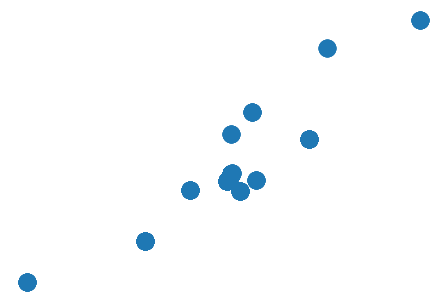

In [248]:
G_copy = nx.Graph(A_copy)
nx.draw_spectral(G_copy)

In [249]:
adj = nx.adjacency_matrix(G_copy)

In [271]:
adj = A.todense()
type(adj)

numpy.matrix

In [290]:
adj_copy = adj.copy()

In [280]:
for i in range(adj_copy.shape[0]):
    for j in range(adj_copy.shape[1]):
        if i == j:
            adj_copy[i][j] = 0
        else:
            continue

IndexError: index 1 is out of bounds for axis 0 with size 1

In [281]:
adj_copy = nfill_diagonal(adj_copy,0)

In [298]:
np.fill_diagonal(adj_copy,0)

In [299]:
adj_copy.diagonal()

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.]])

In [300]:
adj = adj_copy

In [301]:
adj

matrix([[0., 0., 1., ..., 0., 0., 0.],
        [1., 0., 1., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [308]:
from sklearn.cluster import AffinityPropagation
clustering = AffinityPropagation().fit(adj)

In [309]:
clustering

AffinityPropagation()

In [310]:
clustering.labels_.min()

-1

In [311]:
 clustering.cluster_centers_

array([], shape=(0, 200), dtype=float64)

In [312]:
from sklearn.cluster import SpectralClustering
clustering = SpectralClustering(n_clusters=3,random_state=0).fit(adj)

In [313]:
clustering

SpectralClustering(n_clusters=3, random_state=0)

In [314]:
clustering.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [316]:
import networkx as nx
import numpy as np

m = adj
G = nx.from_numpy_matrix(m)
degree_matrix = nx.laplacian_matrix(G).toarray()

In [318]:
degree_matrix.shape

(200, 200)

In [319]:
degree_matrix

array([[ 3., -1., -1., ...,  0.,  0.,  0.],
       [-1.,  2., -1., ...,  0.,  0.,  0.],
       [-1., -1.,  4., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  2., -1.,  0.],
       [ 0.,  0.,  0., ..., -1.,  2.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  3.]])

In [322]:
degree_matrix_inv = np.linalg.pinv(degree_matrix)
print(degree_matrix_inv.shape)
degree_matrix_inv

(200, 200)


array([[ 2.36190476e-01, -1.90476190e-03, -4.00000000e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.90476190e-03,  3.79047619e-01, -4.00000000e-02, ...,
        -2.09982063e-72, -2.09982063e-72, -2.09982063e-72],
       [-4.00000000e-02, -4.00000000e-02,  1.60000000e-01, ...,
        -2.53560134e-71, -2.53560134e-71, -2.53560134e-71],
       ...,
       [-2.97547862e-87, -4.92207398e-31, -3.54205371e-31, ...,
         2.78487538e+00,  2.45154205e+00,  6.43849740e-01],
       [-1.20924079e-87, -4.91373482e-31, -3.53675067e-31, ...,
         2.45154205e+00,  2.78487538e+00,  6.43849740e-01],
       [-2.09235970e-87, -3.91575177e-31, -2.81815571e-31, ...,
         6.43849740e-01,  6.43849740e-01,  2.16949077e+00]])

In [332]:
v = np.ones((200,1))
v.shape

(200, 1)

In [341]:
w =np.matmul(degree_matrix_inv,adj)
v_t = np.random.rand(200,1)
chi_t = np.random.rand(200,1)

In [342]:
v_t.shape

(200, 1)

In [337]:
abs(v-(w*v)/(np.linalg.norm(w*v))).max()

1.2347215344876206

In [ ]:
while(True):
    v_t = (np.matmul(w,v_t))/(np.linalg.norm(np.matmul(w,v_t))
    chi_t = abs(v_t)                          

In [351]:
from sklearn.manifold import spectral_embedding
embedding = spectral_embedding(w)

ValueError: non-broadcastable output operand with shape (200,) doesn't match the broadcast shape (1,200)

In [353]:
type(adj)

numpy.matrix

In [370]:
from sknetwork.data import karate_club, painters, movie_actor
from sknetwork.embedding import Spectral, BiSpectral, cosine_modularity

C:\Users\athar\Anaconda3\envs\mvts_fss_ay\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [386]:
spectral = Spectral(1)
embedding = spectral.fit_transform(adj_1)
embedding.shape

ArpackNoConvergence: ARPACK error -1: No convergence (2001 iterations, 1/2 eigenvectors converged)

In [381]:
adj_1.shape

(200, 200)

In [378]:
embedding

array([[-0.00417119,  0.00226135, -0.00311753, ...,  0.        ,
         0.        ,  0.        ],
       [-0.004136  ,  0.00224227, -0.00309123, ...,  0.        ,
         0.        ,  0.        ],
       [-0.00418282,  0.00226765, -0.00312622, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.00369701,  0.00198773, -0.00272493, ...,  0.        ,
         0.        ,  0.        ],
       [-0.00369701,  0.00198773, -0.00272493, ...,  0.        ,
         0.        ,  0.        ],
       [-0.00374449,  0.00201327, -0.00275993, ...,  0.        ,
         0.        ,  0.        ]])

In [373]:
adj

matrix([[0., 0., 1., ..., 0., 0., 0.],
        [1., 0., 1., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [374]:
adj_1 = nx.adjacency_matrix(G_copy)
adj_1

<200x200 sparse matrix of type '<class 'numpy.float64'>'
	with 728 stored elements in Compressed Sparse Row format>

In [387]:
from sklearn.manifold import spectral_embedding

In [390]:
spectral_embedding(adj_1,1).shape

(200, 1)

In [392]:
# scipy.sparse.csr_matrix.setdiag
adj_copy = adj_1.copy()

In [393]:
adj_copy.setdiag(0)

In [407]:
embed = spectral_embedding(adj_copy,1)

In [397]:
from sklearn.metrics import normalized_mutual_info_score

In [401]:
y_1 = np.ones((100,1)) # M
y_2 = np.zeros((100,1)) #X

In [405]:
y = np.vstack((y_1,y_2))
y.shape

(200, 1)

In [410]:
normalized_mutual_info_score(embed.flatten(), y.flatten())

0.23376397748118283

In [409]:
embed.shape

C:\Users\athar\Anaconda3\envs\mvts_fss_ay\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(200, 1)